In [1]:
!pip install nltk

In [48]:
import re #for regex
import numpy as np

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import string

import nltk

from sklearn.metrics import roc_curve, auc

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
import pandas as pd

In [5]:
!pip install kaggle

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d kazanova/sentiment140

100% 80.9M/80.9M [00:00<00:00, 154MB/s]
100% 80.9M/80.9M [00:00<00:00, 136MB/s]


In [10]:
! unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [11]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
dataset = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin1',names=DATASET_COLUMNS)

In [12]:
dataset.head(100000)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
99995,0,1793820630,Thu May 14 04:05:58 PDT 2009,NO_QUERY,babybigmouth,my son has developed the new habit of waking u...
99996,0,1793820812,Thu May 14 04:06:00 PDT 2009,NO_QUERY,paramoreroxx,looks like my routers broke more tweets from ...
99997,0,1793820858,Thu May 14 04:06:00 PDT 2009,NO_QUERY,beckypope,i really dont want to be in college right now....
99998,0,1793820982,Thu May 14 04:06:02 PDT 2009,NO_QUERY,XMissxXxMurderX,@flossa *offers you pepto*


In [13]:
len(dataset)

1600000

In [14]:
dataset.shape

(1600000, 6)

In [15]:
dataset.info

<bound method DataFrame.info of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [16]:
dataset.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [17]:
np.sum(dataset.isnull().any(axis=1))

0

In [18]:
dataset['target'].unique()

array([0, 4])

In [19]:
dataset['target'].nunique()

2

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

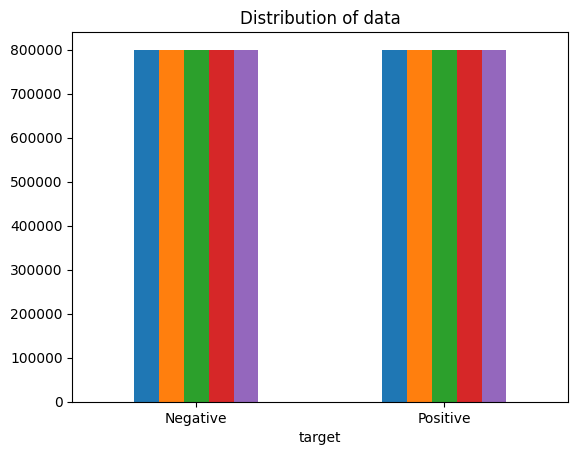

In [20]:
ax = dataset.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [21]:
text, sentiment = list(dataset['text']), list(dataset['target'])

<Axes: xlabel='target', ylabel='count'>

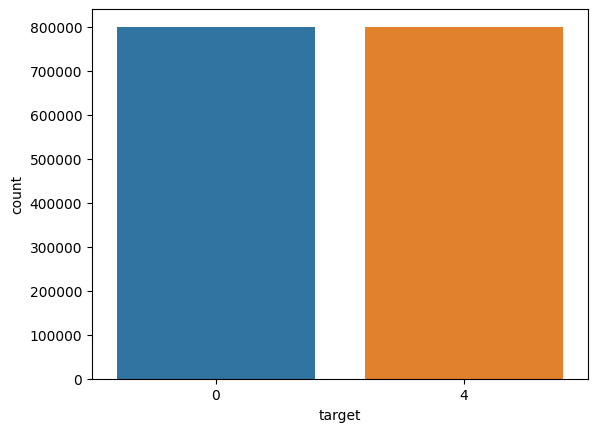

In [22]:
import seaborn as sns
sns.countplot(x='target', data=dataset)

In [23]:
data=dataset[['text','target']]

In [24]:
data['target'] = data['target'].replace(4,1)

<ipython-input-24-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [25]:
data['target'].unique()

array([0, 1])

In [26]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [27]:
#taking 1/4th of data
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [28]:
dataset = pd.concat([data_pos, data_neg])

In [29]:
#text to lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [30]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [31]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [32]:
#removing punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [33]:
#removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [34]:
#removing urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [35]:
#removing numerals
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [36]:
# tokenization
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [37]:
# lemmatization

lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

In [38]:
#splitting feature label
X=data.text
y=data.target

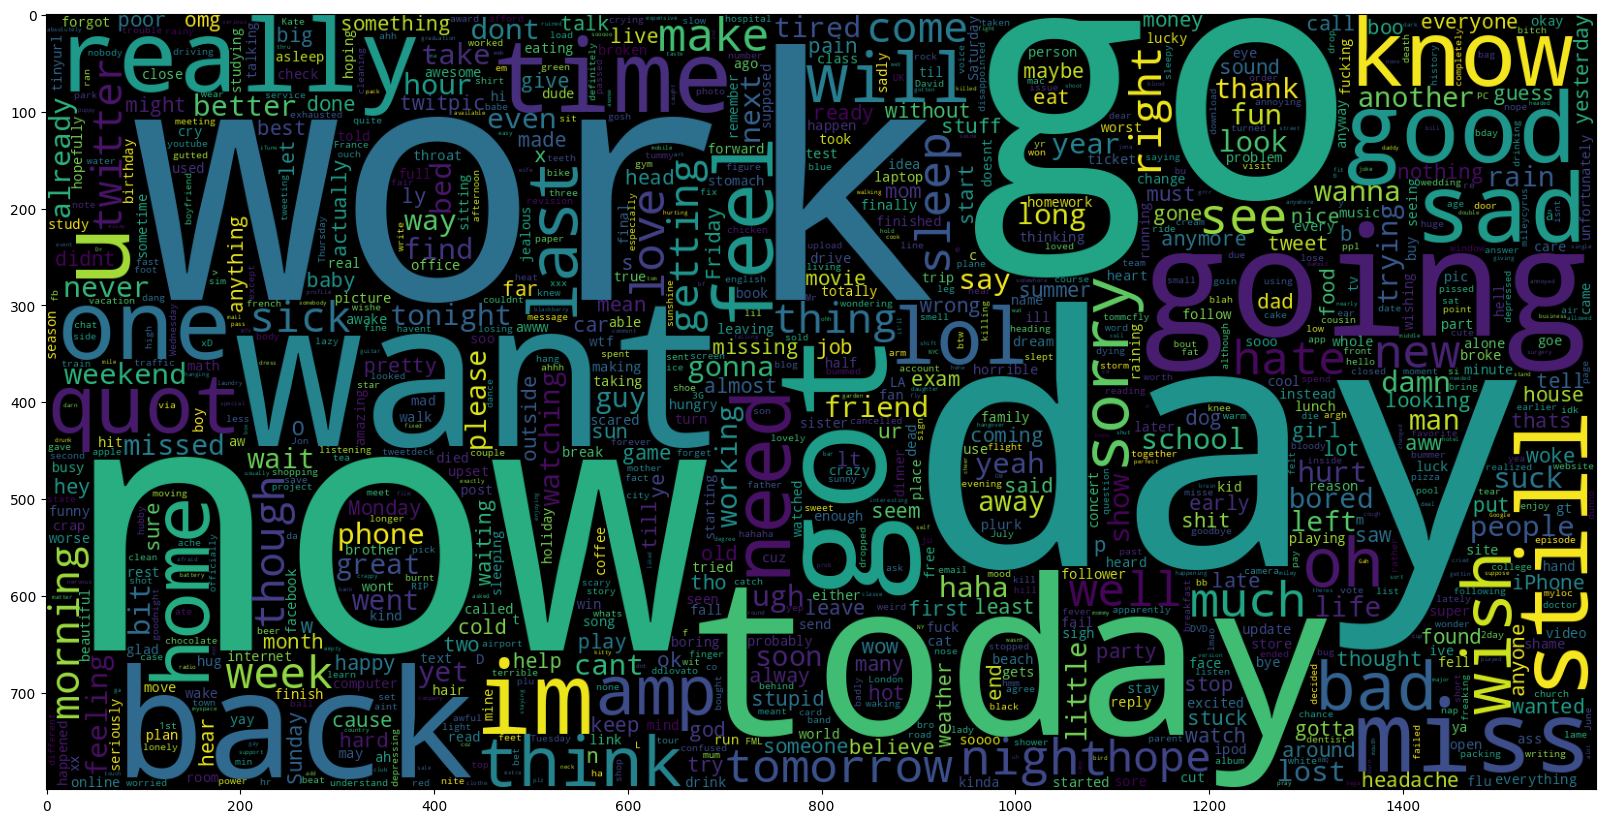

In [39]:
#cloud of negative tweets
negativeData=data['text'][:800000]
plt.figure(figsize=(20,20))
wordCloud=WordCloud(max_words=1000,width=1600,height=800,collocations=False).generate(" ".join(negativeData))
plt.imshow(wordCloud)

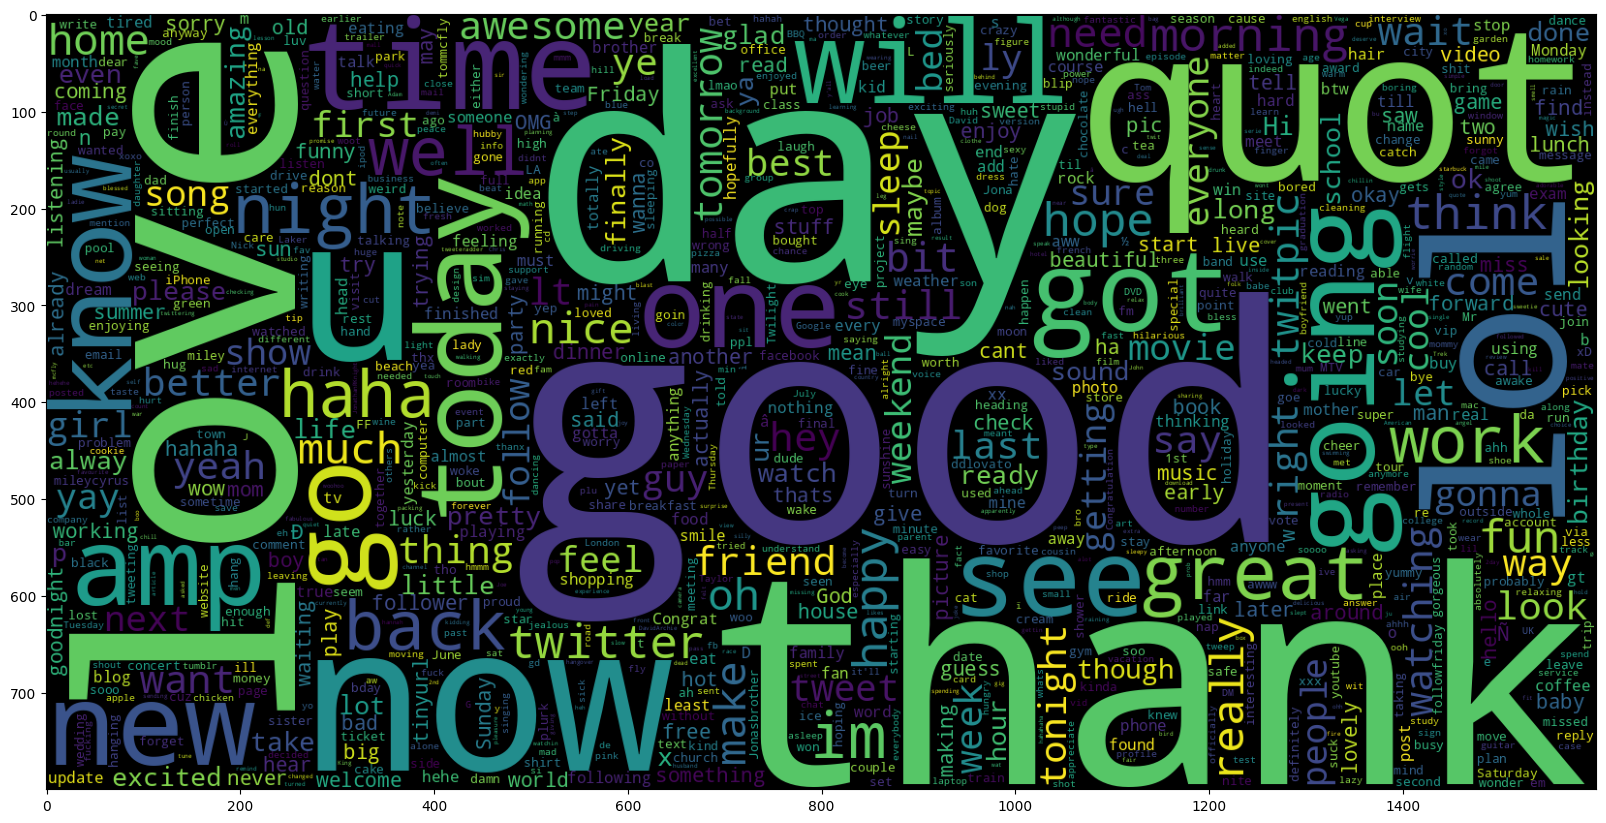

In [40]:
#cloud of positive tweets
positiveData=data['text'][800000:]
plt.figure(figsize=(20,20))
wordCloud=WordCloud(max_words=1000,width=1600,height=800,collocations=False).generate(" ".join(positiveData))
plt.imshow(wordCloud)

In [41]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [42]:
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(X_train)
print(len(vectoriser.get_feature_names_out()))

500000


In [43]:
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

In [44]:
#create model evaluation function
def modeEval(model):
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  confusionMatrix=confusion_matrix(y_test,y_pred)
  category=['Positive','Negative']
  groups=['True Positive','True Negative','False Positive','False Negative']
  groupPer=['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(groups,groupPer)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(confusionMatrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = category, yticklabels = category)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



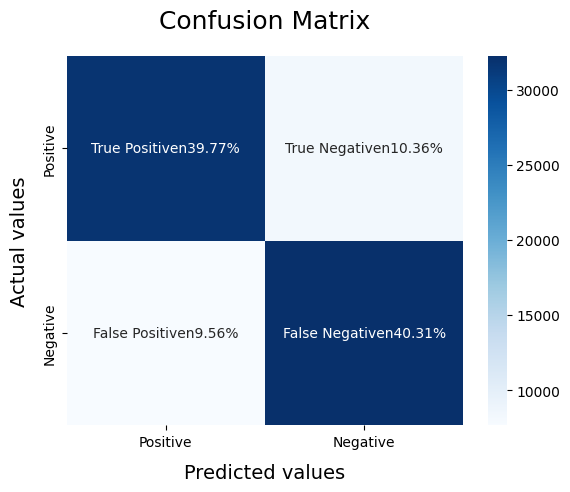

In [45]:
#Naive Bayes model
NBModel=BernoulliNB()
NBModel.fit(X_train,y_train)
modeEval(NBModel)
y_pred1=NBModel.predict(X_test)

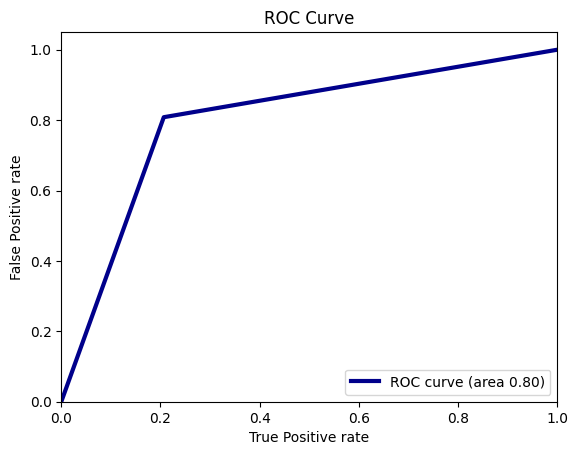

In [51]:
#ROC AUC
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
rocAUC=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkblue",lw=3,label='ROC curve (area %0.2f)'%rocAUC)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('True Positive rate')
plt.ylabel('False Positive rate')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



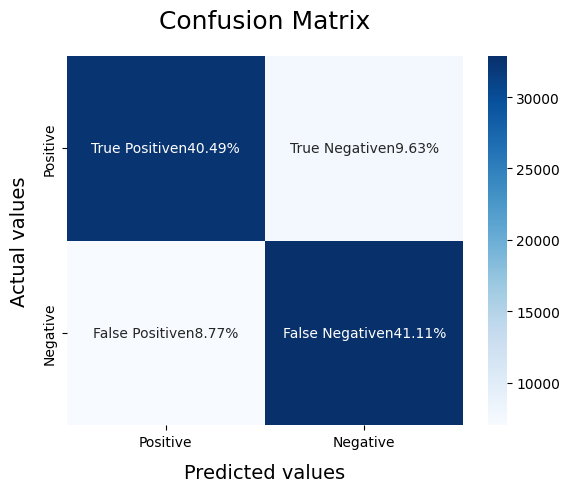

In [52]:
#SVM Model
SVCmodel=LinearSVC()
SVCmodel.fit(X_train,y_train)
modeEval(SVCmodel)
y_pred2=SVCmodel.predict(X_test)

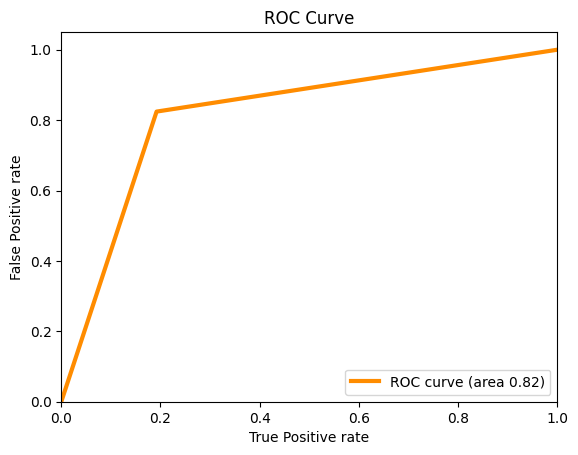

In [53]:
#ROC AUC
fpr,tpr,thresholds=roc_curve(y_test,y_pred2)
rocAUC=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=3,label='ROC curve (area %0.2f)'%rocAUC)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('True Positive rate')
plt.ylabel('False Positive rate')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.82      0.82     40100
           1       0.82      0.83      0.83     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



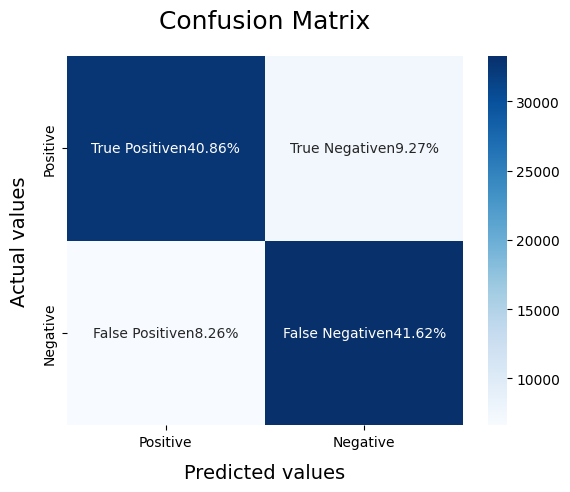

In [55]:
#logistic regression
LRmodel=LogisticRegression()
LRmodel.fit(X_train,y_train)
modeEval(LRmodel)
y_pred3=LRmodel.predict(X_test)

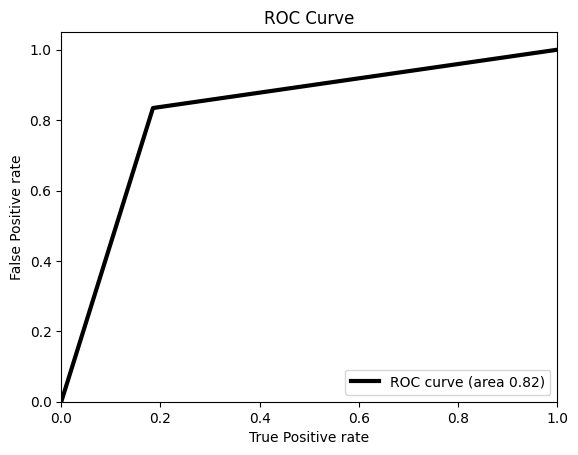

In [56]:
#ROC AUC
fpr,tpr,thresholds=roc_curve(y_test,y_pred3)
rocAUC=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="black",lw=3,label='ROC curve (area %0.2f)'%rocAUC)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('True Positive rate')
plt.ylabel('False Positive rate')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()